# TP 02 : Régression logistique Multinomiale

Binômes : 
- Binôme 1
- Binôme 2


**INTRODUCTION**

Nous avons implémenté le cas d'une seule classe (binaire : oui ou non). Pour appliquer un classement sur plusieurs classes, on peut entrainner $L$ modèles de régression logistique (où $L$ est le nombre des classes). Dans ce cas, nos résultats (Y) doivent encodée en 0 et 1. Pour un modèle $M_i$ d'une classe $C_i$, la sortie $Y$ doit avoir 1 si $C_i$, 0 si une autre classe. (One-to-rest classification)

Une autre approche (celle qu'on va implémenter) est d'encoder la sortie en utilisant OneHot encoder. Pour $L$ classes et un échantillon donnée, on va avoir $L$ sorties (une ayant 1 et les autres 0). Pour un dataset avec $M$ échantillons, $N$ caractéristiques et $L$ classes, on va avoir les dimensions suivantes : 
- $X [M, N]$
- $Y [M, L]$
- $\theta [N, L]$

Cette dernière approche s'appelle maximum entropy (MaxEnt). Elle généralise la régresion logistique.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import outils
%matplotlib inline


## I. Réalisation des algorithmes

Cette partie sert à améliorer la compréhension les algorithmes d'apprentissage automatique vus en cours en les implémentant à partir de zéro. 
Pour ce faire, on va utiliser la bibliothèque **numpy** qui est utile dans les calcules surtout matricielles.

### I.1. Combinaison linéaire

On combine les $N$  caractéristiques linéairement comme dans la régression linéaire binaire. 
La seule différence est que nous avons plus de classes, donc le nombre des paramètres va être multiplié par le nombre des classes.
La somme pondérée d'une classe $c$ est calculée selon la formule : 

$$Z_c = zfn_c(X, \theta) = \sum\limits_{j=0}^{N} \theta_{(c, j)} X_j | X_0 = 1 $$

La forme matricielle de $Z$ sera : 
$$Z = zfn(X, \theta) = X \cdot \theta$$

- $X[M, N]$ : une matrice de M lignes (échantillons) et N colonnes (caractéristiques, y compris le biais).  
- $\theta[N, L]$ : une matrice de N lignes (caractéristiques, y compris le biais) et L colonnes (classes). 
- $Z[M, L]$ : une matrice de M lignes (échantillons) et L colonnes (classes).

In [2]:
# TODO implémenter la fonction de combinaison linéaire 
def zfn(X, Theta): 
    return X@Theta

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# array([[0. , 0. , 0. ],
#        [0.5, 0.1, 0.6],
#        [0.2, 0.3, 0. ],
#        [0.7, 0.4, 0.6]])
#---------------------------------------------------------------------

X_tn = np.array([[0., 0.], 
                 [1., 0.], 
                 [0., 1.], 
                 [1., 1.]]) # 4 échntillons, 2 caractéristiques
Theta_tn = np.array([[0.5, 0.1, 0.6],
                     [0.2, 0.3, 0.0]]) # 2 caractéristiques, 3 classes
zfn(X_tn, Theta_tn)

array([[0. , 0. , 0. ],
       [0.5, 0.1, 0.6],
       [0.2, 0.3, 0. ],
       [0.7, 0.4, 0.6]])

### I.2. Calcul des probabilités

Les valeurs combinées sont transformées à des probabilités en utilisant la fonction softmax. 
La fonction softmax nous assure que la somme des probabilités des classes égale à 1.
Cette fonction prend les combinaisons linéaires $Z[M, L]$ et calcule les probabilités $P[M, L] comme suite : 

$$softmax(Z)=\frac{e^Z}{\sum\limits_{k=1}^{L} e^{Z_k}}$$

- $M$ nombre des échantillons
- $N$ nombre des caractéristiques
- $L$ nombre des classes
- La somme des probabilités de chaque ligne doit être 1

In [3]:
# TODO compléter la fonction softmax
def softmax(Z):
    return np.exp(Z)/np.sum(np.exp(Z),axis=1).reshape((-1,1))

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# array([[0.33333333, 0.33333333, 0.33333333],
#       [0.36029662, 0.24151404, 0.39818934],
#       [0.34200877, 0.37797814, 0.28001309],
#       [0.37797814, 0.28001309, 0.34200877]])
#---------------------------------------------------------------------
Z_tn = np.array([[0. , 0. , 0. ],
                 [0.5, 0.1, 0.6],
                 [0.2, 0.3, 0. ],
                 [0.7, 0.4, 0.6]])
softmax(Z_tn)

array([[0.33333333, 0.33333333, 0.33333333],
       [0.36029662, 0.24151404, 0.39818934],
       [0.34200877, 0.37797814, 0.28001309],
       [0.37797814, 0.28001309, 0.34200877]])

### I.3. Prédiction 

Etant donnée les probabilités des classes pour chaque échantillon, on doit choisir la classe avec le max de probabilité.

$$
\hat{C}^{(i)}_j = \begin{cases}
1 & si & H^{(i)}_j \ge \max P^{(i)} \\
0 & sinon & \\
\end{cases}
$$

- $H[M, L]$ probabilités où chaque ligne est yn échantillon et chaque collone est une classe
- $\hat{C}[M, L]$ prédictions où chaque ligne est yn échantillon et chaque collone est une classe. $\hat{C}^{(i)}_j \in \{0, 1\}$

In [4]:
# TODO compléter la fonction de prédiction 
# Elle doit calculer la 
# H est un vecteur de probabilités 
def cn(H): 
    return np.where(H>=np.max(H,axis=1).reshape((-1,1)),1,0)

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# array([[1, 1, 1],
#        [0, 0, 1],
#        [0, 1, 0],
#        [1, 0, 0]])
#---------------------------------------------------------------------

H_tn = np.array([[0.33333333, 0.33333333, 0.33333333],
             [0.36029662, 0.24151404, 0.39818934],
             [0.34200877, 0.37797814, 0.28001309],
             [0.37797814, 0.28001309, 0.34200877]])
cn(H_tn)

array([[1, 1, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0]])

### I.4. Calcul du coût 

On réfère aux probabilités trouvées par la fonction softmax comme $H$, où $H_c$ est la probabilité d'une classe $c$.
Etant donné un échantillon $X^{(i)}$, son coût est calculé comme : 

$$ cout(H^{(i)}, Y^{(i)}) = - \sum\limits_{c=1}^{L} Y^{(i)}_c \log(H^{(i)}_c)$$

Le coût total est la moyenne des coût de tous les échantillons

$$J(H, Y) = \frac{1}{M} \sum\limits_{i=1}^{M} cout(H^{(i)}, Y^{(i)})$$

- $H[M, L]$ : les probabilités estimées de chaque échantillon (M) de chaque classe (L)
- $Y[M, L]$ : les probabilités réelles (1 ou 0) de chaque échantillon (M) de chaque classe (L)

In [5]:
# TODO compléter la fonction du coût multinomial
def jn(H, Y): 
    cout=np.sum(Y*-np.log(H))/H.shape[0]
    return cout

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 1.1913194530574498
#---------------------------------------------------------------------

H_tn = np.array([[0.33333333, 0.33333333, 0.33333333],
                 [0.36029662, 0.24151404, 0.39818934],
                 [0.34200877, 0.37797814, 0.28001309],
                 [0.37797814, 0.28001309, 0.34200877]])
Y_tn = np.array([[1,0,0], [0,1,0], [0,0,1], [1,0,0]])

jn(H_tn, Y_tn)

1.1913194530574498

### I.5. Calcul des gradients

La taille des gradients est la même que celle des paramètres $\theta[N, L]$. 

$$\frac{\partial J}{\theta_j} = \frac{1}{M} \sum\limits_{i=1}^{M} (H^{(i)} - Y^{(i)}) X^{(i)}_{j} $$

Sa forme matricielle sera 
$$\frac{\partial J}{\theta_j} = \frac{1}{M} X^\top \cdot (H-Y) $$

- $X[M, N]$ : une matrice de M lignes (échantillons) et N colonnes (caractéristiques, y compris le biais).  
- $H[M, L]$ : les probabilités estimées de chaque échantillon (M) de chaque classe (L)
- $Y[M, L]$ : les probabilités réelles (1 ou 0) de chaque échantillon (M) de chaque classe (L)
- $\frac{\partial J}{\theta}[N, L]$ : une matrice de L lignes (classes) et N colonnes (caractéristiques, y compris le biais). 

In [6]:
# TODO compléter la fonction du gradient multinomial
def dJn(X, H, Y):
    return (1/H.shape[0])*X.T@(H-Y)

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# array([[-0.06543131, -0.11961822,  0.18504953],
#        [-0.07000327,  0.16449781, -0.09449454]])
#---------------------------------------------------------------------
X_tn = np.array([[0., 0.], [1., 0.], [0., 1.], [1., 1.]])
H_tn = np.array([[0.33333333, 0.33333333, 0.33333333],
                 [0.36029662, 0.24151404, 0.39818934],
                 [0.34200877, 0.37797814, 0.28001309],
                 [0.37797814, 0.28001309, 0.34200877]])
Y_tn = np.array([[1,0,0], [0,1,0], [0,0,1], [1,0,0]])

dJn(X_tn, H_tn, Y_tn)

array([[-0.06543131, -0.11961822,  0.18504953],
       [-0.07000327,  0.16449781, -0.09449454]])

### I.6. Descente du gradient adaptative

Les coéfficients sont mis à jour itérativement en se basant sur le gradient et un taux d'apprentissage $\alpha$ comme dans la descente des gradients normale. La différence est que dans **AdaGrad**, on adapte le taux d'apprentissage de chaque paramètre $\theta$ selon l'historique des gradients.


#### I.6.1. Mise à jours des gradients

Dans cette fonction, on va implémenter la désente des gradients normale (celle dans le TP précédent ... Hint: copy-coller)

$$\theta = \theta - \alpha \frac{\partial J(\theta)}{\theta_j}$$

aussi, la déscente des gradients adaptative (AdaGrad)

$$V = V + (\frac{\partial J(\theta)}{\partial \theta})^2$$

$$\theta = \theta - \frac{\alpha}{\sqrt{V +\epsilon}} \frac{\partial J(\theta)}{\theta}$$

- $\theta[N, L]$ : les paramètres de $L$ classes et $N$ caractéristiques
- $\frac{\partial J(\theta)}{\partial \theta}[N, L]$ les gradients de ces paramètres
- $V[N, L]$ : hyper-paramètre pour l'adjustement du taux d'apprentissage pour chaque paramètre
- $\epsilon=e^{-8}$


Quelques conditions sur la fonction :
- La fonction doit retourner les paramètres mises-à-jours et le nouveau vecteur $V$
- Si la valeur booléenne $adagrad=True$, on doit appliquer adagrad (calculer le nouveau V et mettre à jours $\theta$ selon AdaGrad)
- Si cette valeur égale à $False$, on utilise la mise à jour normale



In [16]:
# TODO: Définir la fonction de la mise à jours des paramètres avec AdaGrad
def majThetaAdaGrad(Theta, Gradient, alpha, V, adagrad=False, eps=1e-08):
    
    Theta_new = Theta.copy()
    V_new = V.copy()
    a=0.0
    if(adagrad==True):
        V_new=V+Gradient**2
        a=alpha/((V_new+eps)**(1/2))
    else:
        a=alpha
    Theta_new=Theta-a*Gradient
    return Theta_new, V_new

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# ((array([[0.50065431, 0.10119618, 0.5981495 ],
#          [0.20070003, 0.29835502, 0.00094495]]),
#   array([[0.2 , 0.1 , 0.5 ],
#          [0.05, 0.15, 0.2 ]])),
#  (array([[0.50144768, 0.103538  , 0.59746826],
#          [0.20298765, 0.29609069, 0.00206732]]),
#   array([[0.20428126, 0.11430852, 0.53424333],
#          [0.05490046, 0.17705953, 0.20892922]])))
#---------------------------------------------------------------------
Theta_tn = np.array([[0.5, 0.1, 0.6],
                     [0.2, 0.3, 0.0]]) # 2 caractéristiques, 3 classes
Gradient_tn = np.array([[-0.06543131, -0.11961822,  0.18504953], 
                       [-0.07000327,  0.16449781, -0.09449454]])# 2 caractéristiques, 3 classes
V_tn = np.array([[0.2, 0.1, 0.5],
                [0.05, 0.15, 0.2]]) # 2 caractéristiques, 3 classes
alpha_tn = 0.01
majThetaAdaGrad(Theta_tn, Gradient_tn, alpha_tn, V_tn), majThetaAdaGrad(Theta_tn, Gradient_tn, alpha_tn, V_tn, adagrad=True)

((array([[0.50065431, 0.10119618, 0.5981495 ],
         [0.20070003, 0.29835502, 0.00094495]]),
  array([[0.2 , 0.1 , 0.5 ],
         [0.05, 0.15, 0.2 ]])),
 (array([[0.50144768, 0.103538  , 0.59746826],
         [0.20298765, 0.29609069, 0.00206732]]),
  array([[0.20428126, 0.11430852, 0.53424333],
         [0.05490046, 0.17705953, 0.20892922]])))

#### I.6.2. La descente des gradients



In [17]:
def des_grad_adagrad(X, Y, Theta, max_iter=200, alpha=0.1, adagrad=False):
    
    couts = []
    
    V = np.zeros(Theta.shape) # Générer des zéros
    Theta1 = Theta.copy() # pour ne pas modifier Theta original
    
    for i in range(max_iter): # Ici, la seule condition d'arrêt est le nombre des itérations
        H = softmax(zfn(X, Theta1))
        couts.append(jn(H, Y))
        Theta1, V = majThetaAdaGrad(Theta1, dJn(X, H, Y), alpha, V, adagrad=adagrad)
    
    return Theta1, couts

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# (array([[ 0.84298097,  1.57919742, -1.22217839],
#         [ 0.60036187, -1.45101777,  1.3506559 ]]),
#  0.5977646913907274)
#---------------------------------------------------------------------
X_tn = np.array([[0., 0.], [1., 0.], [0., 1.], [1., 1.]]) # deux variables logiques
Y_tn = np.array([[1,0,0], [0,1,0], [0,0,1], [1,0,0]]) # égale, sup, inf, égale
Theta_tn = np.array([[0.5, 0.1, 0.6],
                     [0.2, 0.3, 0.0]]) # 2 caractéristiques, 3 classes

theta_n, couts_n = des_grad_adagrad(X_tn, Y_tn, Theta_tn)

theta_n, couts_n[-1]

(array([[ 0.84298097,  1.57919742, -1.22217839],
        [ 0.60036187, -1.45101777,  1.3506559 ]]),
 0.5977646913907274)

### I.7. Regrouper les fonctions ensemble 

Pour bien gérer l'entrainnement et la prédiction, on rassemble les fonctions que vous avez implémenté dans une seul classe. L'intérêt : 
- Si on applique la normalisation durant l'entrainnement, on doit l'appliquer aussi durant la prédiction. En plus, on doit utiliser les mêmes paramètres (moyenne et écart-type)
- On utilise les thétas optimales lors de la prédicition


In [18]:
class MaxEnt(object):
    
    def __init__(self, norm=True, const=True): 
        self.norm = norm
        self.const = const
    
    def entrainer(self, X, Y, max_iter=100, alpha=.01, adagrad=False): 
        X_pre, self.mean, self.std = outils.preparer(X, norm=self.norm, const=self.const)
        Theta = np.zeros((X_pre.shape[1], Y.shape[1])) # Theta[N, L]
        self.Theta, self.couts = des_grad_adagrad(X_pre, Y, Theta, max_iter=max_iter, alpha=alpha, adagrad=adagrad)
        
        
    # La prédiction
    # si prob=True elle rend un vecteur de probabilités
    # sinon elle rend une vecteur de 1 et 0
    def predire(self, X, prob=True):
        X_pre, self.mean, self.std = outils.preparer(X, norm=self.norm, const=self.const, mean=self.mean, std=self.std)
        H = softmax(zfn(X_pre, self.Theta))
        if prob:
            return H
        return cn(H)


#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# array([[1, 0, 0],
#        [0, 1, 0],
#        [0, 1, 0],
#        [0, 0, 1]])
#---------------------------------------------------------------------
X_tn = np.array([[0., 0.], [1., 0.], [0., 1.], [1., 1.]]) # deux variables logiques
Y_tn = np.array([[1,0,0], [0,1,0], [0,0,1], [1,0,0]]) # égale, sup, inf, égale

X_testn = np.array([[2., 2.], [1., 0.], [1., -1.], [2., 5.]])

maxent = MaxEnt()
maxent.entrainer(X_tn, Y_tn)
maxent.predire(X_testn, prob=False)

array([[1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1]])

## II Application et analyse

On va utiliser [Iris dataset](https://archive.ics.uci.edu/ml/datasets/iris) pour classer des fleurs en trois classes, en utilisant 4 caractéristiques. Pour simplification, on va utiliser seulement 2 caractéristiques: Petal Length (cm); Petal Width (cm). D'après [Ce tutoriel](https://teddykoker.com/2019/06/multi-class-classification-with-logistic-regression-in-python/) ces 2 caractéristiques sont suffisantes.

**Dans cette partie, vous n'avez rien à programmer. Mais, il faut analyser les résultats à la fin**

Deux solutions à analyser : 
- Entrainer 3 modèles de régression logistique binaire
- Entrainer 1 modèle de régression logistique multinomial 

In [19]:
iris = pd.read_csv("datasets/iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
if iris.shape[1] > 3:
    iris.drop(["sepal_length", "sepal_width"], axis = 1, inplace=True)
iris.head()

,petal_length,petal_width,class
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa


### II.1. Séparabilité des classes

**TODO : Analyser les résultats**
- Que remarquez-vous concernant la séparabilité des 3 classes?
- Donner une hypothèse concernant la performance des modèles sur ce dataset (Rappel, Précision)
- Justifier cette hypothèse (Rappel, Précision) en comparant les 3 classes

**Réponse**
- on remarque que la classe iris-setosa est bien sépare des deux autres classe et ses membres sont caractérisés par des petites taille et largeur de sepal alors que les deux autres classes versicolor et virginica sont proche  

- une précision et un rappel forte pour la classe setosa et puisque les deux autres classes sont proche le modèle va classer une des deux avec une forte précision par rapport à l'autre et similairement pour le rappel(une avec forte rappel)     
- on peut justifier l'hypothèse par le fait que la classe setosa est bien éloignée et linéairement séparable des deux autres et donc le modèle va reconnaitres tous les élément de cette classe parfaitement (fort rappel) et il va pas classifier les éléments des autres classe comme étant setosa (fort précision) 
 

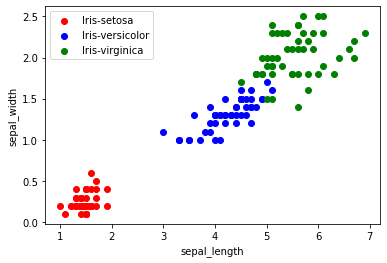

In [21]:
Xiris = iris.iloc[:, :-1].values # Premières colonnes 

Yiris = iris.iloc[:,-1].values # Dernière colonne 

setosa = iris["class"] == "Iris-setosa"
versicolor = iris["class"] == "Iris-versicolor"
virginica = iris["class"] == "Iris-virginica"

plt.scatter(Xiris[setosa, 0], Xiris[setosa, 1], color="red", label="Iris-setosa")
plt.scatter(Xiris[versicolor, 0], Xiris[versicolor, 1], color="blue", label="Iris-versicolor")
plt.scatter(Xiris[virginica, 0], Xiris[virginica, 1], color="green", label="Iris-virginica")

plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.legend()
plt.show()

In [22]:
from sklearn.model_selection import train_test_split  

Xiris_train, Xiris_test, Yiris_train, Yiris_test = train_test_split(Xiris, Yiris, test_size=0.2, random_state=0)  

len(Xiris_train), len(Xiris_test)

(120, 30)

### II.2. AdaGrad

Nous avons entraîné deux modèles : 
- **DG** : modèle avec la déscente du gradient normale
- **AdaGrad** : modèle avec AdaGrad

In [23]:
from sklearn.preprocessing import OneHotEncoder
enc_iris = OneHotEncoder()
Yiris_train_enc = enc_iris.fit_transform(np.array(Yiris_train).reshape(-1,1))

Yiris_train_enc.toarray()[:4, :]

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

#### II.2.1. Convergence

Ici, on veut tester la convergence : rapidité et convergence finale (moins d'erreur = meilleur)

**TODO : Analyser les résultats**
- Que remarquez-vous ?
- Donner une hypothèse
- Essayer de justifier cette hypothèse en se basant sur la formule de AdaGrad
- Peut-on utiliser AdaGrad lorsque nous avons beaucoup de minimums locaux ? Pourquoi ?

**Réponse**
- on remarque que adagrad converge plus lentement que DG (vitesse de convergence décroît avec les itérations pour adagrad par rapport à DG) et aussi DG aboutit à une meilleur qualité de convergence que adagrad (plus petit erreur)  
- adagrad visent à aboutir au plus proche optimum local par la décroissement de la vitesse de convergence après chaque itération
- adagrad utilise les formule suivantes:

$$V = V + (\frac{\partial J(\theta)}{\partial \theta})^2$$

$$\theta = \theta - \frac{\alpha}{\sqrt{V +\epsilon}} \frac{\partial J(\theta)}{\theta}$$

on voit clairement que dans adagrad on divise alpha par la racine carrée de la somme des carrée des dérivée partielle cette dernière( somme ) croit à chaque itération ce qui rend le paramètre d'entraînement alpha plus petit a chaque étape pour but d'éviter des sauts qu'éloigne l'erreur de l'optimum local 
- non , Adagrad est inadaptée pour des fonctions avec plusieurs minimums locaux car dans ce cas elle va coincée dans le plus proche optimum local et dans ce cas la qualité de convergence va dépendre fortement de l'initialisation des theta


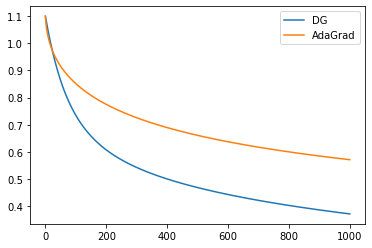

In [25]:
MAX_ITER = 500
mxent_dg = MaxEnt()
mxent_dg.entrainer(Xiris_train, Yiris_train_enc.toarray(), max_iter=MAX_ITER)
mxent_adagrad = MaxEnt()
mxent_adagrad.entrainer(Xiris_train, Yiris_train_enc.toarray(), adagrad=True, max_iter=MAX_ITER)



plt.plot(mxent_dg.couts, label = "DG")
plt.plot(mxent_adagrad.couts, label = "AdaGrad")
plt.legend()
plt.autoscale()
plt.show()



#### II.2.1. Performance (AdaGrad)

Ici, on veut tester la performance sur le dataset de test.

**TODO : Analyser les résultats**
- Que remarquez-vous (Précision vs Recall (setosa); GD vs AdaGrad (micro-avg)) ?
- Donner une hypothèse sur la convergence AdaGrad (peut-t-on converger) et comment l'améliorer
- Essayer de justifier cette hypothèse (GD vs AdaGrad)

**Réponse**
- DG a donner des meilleur performance que Adagrad (meilleur precision recall et macro-avg)
- la qualité de convergence de Adagrad est pire que celle de DG car Adagrad a coincé dans un optimum local,on peut améliorer la convergence de Adagrad en :
1. utilisant les vecteurs des thêta a des valeurs plus proche de l'optimum trouvé par DG
2. utiliser une somme pondérée(peut croître ou décroître ) des dérivée partielle  
 $$V = beta*V + (1-beta) * (\frac{\partial J(\theta)}{\partial \theta})^2$$
 beta dans [0,1]
- on peut justifier la qualité de convergence de Adagrad par le fait qu'il utilise un hyper-paramètre alpha qui décroît à chaque étape et va éventuellement soit s'annuler (on peut plus avancé) soit il va pousser la fonction objective a coincé dans un optimum locale  

In [27]:
from sklearn.metrics import classification_report

print("Descente du gradient")
print(classification_report(Yiris_test, enc_iris.inverse_transform(mxent_dg.predire(Xiris_test)), target_names=enc_iris.categories_[0]))

print("AdaGrad")
print(classification_report(Yiris_test, enc_iris.inverse_transform(mxent_adagrad.predire(Xiris_test)), target_names=enc_iris.categories_[0]))

Descente du gradient
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.54      0.70        13
 Iris-virginica       0.50      1.00      0.67         6

       accuracy                           0.80        30
      macro avg       0.83      0.85      0.79        30
   weighted avg       0.90      0.80      0.80        30

AdaGrad
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.46      0.63        13
 Iris-virginica       0.46      1.00      0.63         6

       accuracy                           0.77        30
      macro avg       0.82      0.82      0.75        30
   weighted avg       0.89      0.77      0.77        30



### II.3. One-vs-Rest OU One-vs-One

Nous avons entrainé deux modèles : 
- **One-vs-Rest** : ici, trois sous-modèles binaires sont entraînés ; un pour chaque class. Chaque sous modèle détecte si l'échantillon appartient à sa classe ou non. Lors de la prédiction, on prend la classe avec le max de probabilité
- **One-vs-One** : ici, un modèle de régression logistique multinomiale (maximum entropy) est entraîné pour séparer les trois classes

**TODO : Analyser les résultats**
On remarque que la performance de One-vs-One est meilleure que celle de One-vs-Rest
- Pourquoi ? (en se basant sur la limite de décision et les paramètres)
- Quel mécanisme de ces deux est affecté beaucoup plus par les valeurs aberrantes (les échantillons d'une classe qui peuvent se retrouver aux milieu d'une autre classe)

**Réponse**
- la décision et la modification des paramètres Theta se fait uniquement en tenir compte d'une classe dans one-vs-rest contrairement a one-vs-one qui tient compte de l'interaction entre classe 
- le premier mécanisme (one vs rest ) est affectée beaucoup plus par les valeurs aberrantes  

In [ ]:
from sklearn.linear_model import LogisticRegression

one2rest = LogisticRegression(solver="lbfgs", penalty="none", multi_class="ovr")
one2rest.fit(Xiris_train, Yiris_train)

one2one = LogisticRegression(solver="lbfgs", penalty="none", multi_class="multinomial")
one2one.fit(Xiris_train, Yiris_train)

print("One-vs-Rest")
print(classification_report(Yiris_test, one2rest.predict(Xiris_test)))

print("One-vs-One")
print(classification_report(Yiris_test, one2one.predict(Xiris_test)))

In [ ]:
print("Bonne chance")